In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score, roc_auc_score

# генерируем данные 
X, y = make_classification(n_samples=100000, n_features=20, 
                           n_classes=2, n_informative=5, 
                           n_redundant=2, random_state=42)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

((100000, 20), (100000,))


In [33]:
import sklearn
sklearn.__version__

'0.20.2'

In [2]:
# классы сбалансированы
y_train.mean()


0.4998714285714286

In [48]:
# обучим классификатор
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
y_pred = xgb.predict_proba(X_test)

In [50]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])

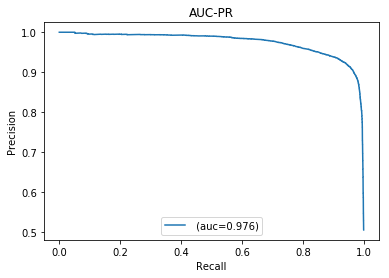

In [51]:
def plot_precision_and_recall(precision, recall, thresholds):
    
    AUC = auc(recall, precision)   
    plt.plot(recall,precision,linewidth=1.5,label=' (auc=%.3f)'%AUC)
    plt.xlabel('Recall')# make axis labels
    plt.ylabel('Precision')
   
    plt.title('AUC-PR')
    plt.legend(loc='lower center')
    plt.show()
    
plot_precision_and_recall(precision, recall, thresholds)

In [52]:
auc_prc = average_precision_score(y_test, y_pred[:, 1])
roc_auc = roc_auc_score(y_test, y_pred[:, 1])
print('auc_pr_score: {}\nroc_auc_score: {}\n'.format(float(auc_prc), roc_auc))

auc_pr_score: 0.975526501775
roc_auc_score: 0.978058776218



In [56]:
# сгенерируем еще только ноликов (n_classes=1)
X_zero, y_zero = make_classification(n_samples=500000, n_features=20, 
                                    n_classes=1, n_informative=5, 
                                    n_redundant=2, random_state=45)


In [57]:
X_test_extra_zero = np.concatenate([X_zero, X_test])
y_test_extra_zero = np.concatenate([y_zero, y_test])
y_test_extra_zero.mean()


0.02829433962264151

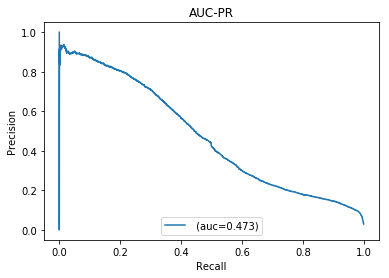

In [58]:
y_pred_extra = xgb.predict_proba(X_test_extra_zero)

precision_extra, recall_extra, thresholds_extra = precision_recall_curve(y_test_extra_zero, y_pred_extra[:, 1])

plot_precision_and_recall(precision_extra, recall_extra, thresholds_extra)


In [59]:
auc_prc = average_precision_score(y_test_extra_zero, y_pred_extra[:, 1])
roc_auc = roc_auc_score(y_test_extra_zero, y_pred_extra[:, 1])
print('auc_pr_score: {}\nroc_auc_score: {}\n'.format(float(auc_prc), roc_auc))

auc_pr_score: 0.472789069338
roc_auc_score: 0.943955627554



In [60]:
# обучим классификатор
xgb = XGBClassifier(scale_pos_weight=99)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=99, seed=None,
       silent=True, subsample=1)

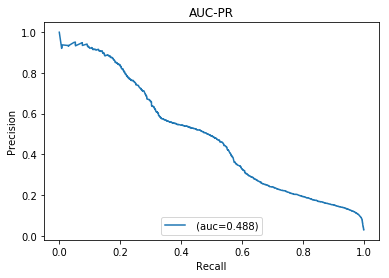

In [61]:
y_pred_extra = xgb.predict_proba(X_test_extra_zero)

precision_extra, recall_extra, thresholds_extra = precision_recall_curve(y_test_extra_zero, y_pred_extra[:, 1])

plot_precision_and_recall(precision_extra, recall_extra, thresholds_extra)

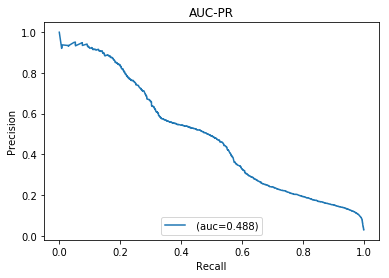

In [62]:
y_pred_extra = xgb.predict_proba(X_test_extra_zero)

precision_extra, recall_extra, thresholds_extra = precision_recall_curve(y_test_extra_zero, y_pred_extra[:, 1])

plot_precision_and_recall(precision_extra, recall_extra, thresholds_extra)

In [63]:
auc_prc = average_precision_score(y_test_extra_zero, y_pred_extra[:, 1])
roc_auc = roc_auc_score(y_test_extra_zero, y_pred_extra[:, 1])
print('auc_pr_score: {}\nroc_auc_score: {}\n'.format(float(auc_prc), roc_auc))

auc_pr_score: 0.487939810274
roc_auc_score: 0.948787397278



In [64]:
from sklearn.calibration import CalibratedClassifierCV

In [65]:
xgb = XGBClassifier()
clf_isotonic = CalibratedClassifierCV(xgb, cv=3, method='isotonic')
clf_isotonic.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
            cv=3, method='isotonic')

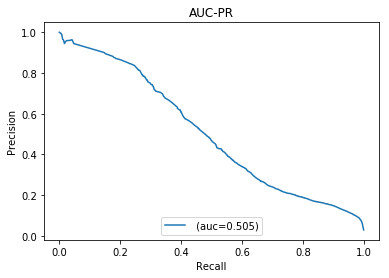

In [66]:
y_pred_extra = clf_isotonic.predict_proba(X_test_extra_zero)

precision_extra, recall_extra, thresholds_extra = precision_recall_curve(y_test_extra_zero, y_pred_extra[:, 1])

plot_precision_and_recall(precision_extra, recall_extra, thresholds_extra)

In [67]:
auc_prc = average_precision_score(y_test_extra_zero, y_pred_extra[:, 1])
roc_auc = roc_auc_score(y_test_extra_zero, y_pred_extra[:, 1])
print('auc_pr_score: {}\nroc_auc_score: {}\n'.format(float(auc_prc), roc_auc))

auc_pr_score: 0.501198017512
roc_auc_score: 0.945979913846



In [68]:
xgb = XGBClassifier()
clf_isotonic = CalibratedClassifierCV(xgb, cv=3, method='sigmoid')
clf_isotonic.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
            cv=3, method='sigmoid')

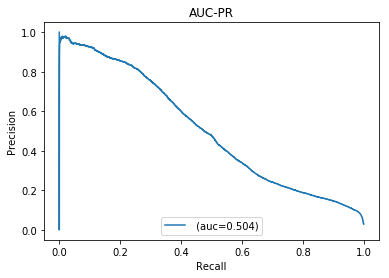

In [69]:
y_pred_extra = clf_isotonic.predict_proba(X_test_extra_zero)

precision_extra, recall_extra, thresholds_extra = precision_recall_curve(y_test_extra_zero, y_pred_extra[:, 1])

plot_precision_and_recall(precision_extra, recall_extra, thresholds_extra)

In [70]:
auc_prc = average_precision_score(y_test_extra_zero, y_pred_extra[:, 1])
roc_auc = roc_auc_score(y_test_extra_zero, y_pred_extra[:, 1])
print('auc_pr_score: {}\nroc_auc_score: {}\n'.format(float(auc_prc), roc_auc))

auc_pr_score: 0.504133211654
roc_auc_score: 0.94603814724

